In [184]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
%matplotlib inline

In [185]:
dataset = pd.read_csv('data/ex2data2.txt', sep = ',')
X = dataset.iloc[:, :2].values
y = dataset.iloc[:, 2].values

In [102]:
# X = np.c_[np.ones(X.shape[0]), X]

In [186]:
def plot_data(X, y, label_x, label_y, label_pos, label_neg):
    pos = y == 1
    neg = y == 0
    plt.figure()
    plt.plot(X[:, 0][pos], X[:, 1][pos], 'k+', ms=7, label=label_pos)
    plt.plot(X[:, 0][neg], X[:, 1][neg], 'yo', ms=7, label=label_neg)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.xlim(-1, 1.5)
    plt.ylim(-1, 1.5)
    plt.legend(numpoints=1, loc=1)

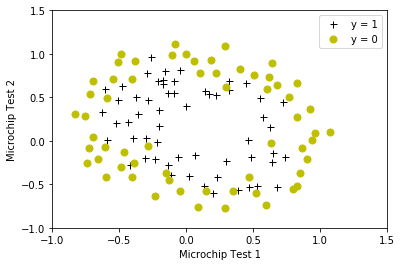

In [187]:
plot_data(X, y, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [188]:
def map_feature(X1, X2):
    degree = 6
    m = np.size(X1)
    out = np.ones(m)
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out = np.vstack((out, X1 ** (i - j) * X2 ** j))
    return out.T

In [189]:
X1 = X[:, 0]
X2 = X[:, 1]

In [190]:
X = map_feature(X1, X2)
N = X.shape[1]

In [193]:
lam = 1
theta_0 = np.zeros(N)

In [194]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

In [195]:
def cost_function(theta, X, y, lam):
    m = np.size(y)
    J = 0
    h = sigmoid(theta.dot(X.T))
    J = (1/ m) * (-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + lam / (2 * m) * np.sum(theta[1:] ** 2)
#     grad = (1 / m) * (h - y).dot(X) + lam / m * np.array([0, *theta[1:]])
    grad = (1 / m) * (h - y).dot(X) + lam / m * np.array([0 if i == 0 else theta[i] for i in range(len(theta))])
    return J, grad

In [196]:
cost_0, _ = cost_function(theta_0, X, y, lam)

In [197]:
res = minimize(cost_function, theta_0, args = (X, y, lam), method = None, jac = True, options= {'maxiter': 400})

In [198]:
theta = res['x']
print('Cost at best-fit theta: %.3f' % res['fun'])

Cost at best-fit theta: 0.530


In [202]:
def poly(theta, x_pts, y_pts):
    result = theta[0] + theta[1] * x_pts + theta[2] * y_pts - 0.5
    k = 3
    degree = 6
    for i in range(1, degree):
        for j in range(i + 1):
            result += theta[k] * x_pts ** (i - j) * y_pts ** j
            k += 1
    return result

In [200]:
def plot_decision_boundary(X1, X2, theta, X, y, num_pts=100):
    x_pts, y_pts = np.ogrid[min(X1):max(X1):num_pts * 1j, min(X2):max(X2):num_pts * 1j]
    plt.figure()
    plt.plot(X1[y == 0], X2[y == 0], 'yo', ms=8, label = 'y = 0')
    plt.plot(X1[y == 1], X2[y == 1], 'k+', ms=8, label = 'y = 1')
    plt.contour(x_pts.ravel(), y_pts.ravel(), poly(theta, x_pts, y_pts), levels=[0])
    plt.xlabel('Microchip test 1')
    plt.ylabel('Microchip test 2')
    plt.xlim(-1, 1.5)
    plt.ylim(-0.9, 1.2)
    plt.legend(numpoints=1, loc=1)    

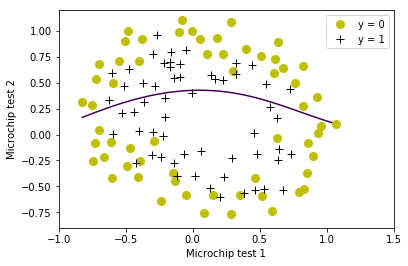

In [203]:
plot_decision_boundary(X1, X2, theta, X, y)